In [17]:
## load modules
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import pandas as pd
import numpy as np
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings('ignore')
from chatto_transform.sessions.mimic import mimic_common

In [15]:
# load potassium measurements 
ktable = pd.read_csv('ktable.csv')
ktable

,Unnamed: 0,subject_id,cmed_hadm_id,cmed_transfertime,k_charttime,k_value,k_valuenum,k_uom,k_hadm_id,k_itemid
0,0,13,143045,2167-01-08 18:44:25,2167-01-08 20:28:00,3.5,3.5,mEq/L,143045,50971
1,1,13,143045,2167-01-08 18:44:25,2167-01-09 07:11:00,4.3,4.3,mEq/L,143045,50971
2,2,13,143045,2167-01-08 18:44:25,2167-01-12 03:27:00,4.1,4.1,mEq/L,143045,50971
3,3,13,143045,2167-01-08 18:44:25,2167-01-12 13:16:00,4.3,4.3,mEq/L,143045,50971
4,4,13,143045,2167-01-08 18:44:25,2167-01-13 06:50:00,4.7,4.7,mEq/L,143045,50971
...,...,...,...,...,...,...,...,...,...,...
277135,277135,99983,117390,2193-04-26 11:35:51,2193-04-29 06:40:00,4.4,4.4,mEq/L,117390,50971
277136,277136,99983,117390,2193-04-26 11:35:51,2193-04-26 15:15:00,4.2,4.2,mEq/L,117390,50971
277137,277137,99983,117390,2193-04-26 11:35:51,2193-04-27 05:57:00,4.5,4.5,mEq/L,117390,50971
277138,277138,99983,117390,2193-04-26 11:35:51,2193-04-26 23:13:00,4.5,4.5,mEq/L,117390,50971


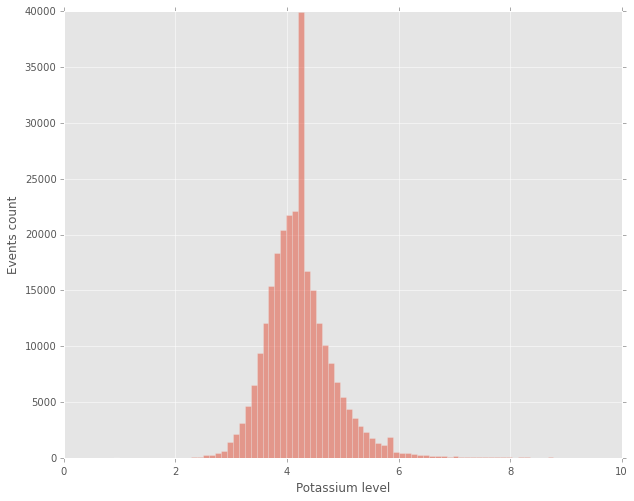

In [23]:
# plot histogram of all potassium levels
plt = ktable['k_valuenum'].plot(kind='hist', alpha=0.5, bins=250)
plt.set_xlim((0,10))
plt.set_xlabel("Potassium level")
plt.set_ylabel("Events count")

In [25]:
# load patients who has potassium lab between 4-6am, and also have a blood pressure drop in the same time frame
df = pd.read_csv('/Users/yankou/Documents/CriticalDatathon/data/pts_with_k_and_map.csv')
df

,Unnamed: 0,subject_id,hadm_id,potassium,date,map_drop,has_potassium,has_drop
0,1,164,182743,4.2,2116-12-30,-11,True,True
1,16,228,167764,3.7,2132-11-02,-22,True,True
2,18,234,134944,4.1,2106-04-06,-8,True,True
3,22,245,105501,6.3,2172-07-10,-8,True,True
4,24,249,116935,3.9,2149-12-19,-32,True,True
...,...,...,...,...,...,...,...,...
540,5596,29961,106698,4.1,2112-04-07,-2,True,True
541,5625,27364,173351,3.5,2101-01-20,-41,True,True
542,5627,27382,161290,4.2,2119-08-17,-1,True,True
543,5652,29376,198773,4.9,2109-09-04,-1,True,True


In [42]:
# convert minus map_drop to absolute value
a = -df['map_drop']
a.name = 'ab_map_drop'
df1 = pd.concat([df, a], axis=1)
df1

,Unnamed: 0,subject_id,hadm_id,potassium,date,map_drop,has_potassium,has_drop,ab_map_drop
0,1,164,182743,4.2,2116-12-30,-11,True,True,11
1,16,228,167764,3.7,2132-11-02,-22,True,True,22
2,18,234,134944,4.1,2106-04-06,-8,True,True,8
3,22,245,105501,6.3,2172-07-10,-8,True,True,8
4,24,249,116935,3.9,2149-12-19,-32,True,True,32
...,...,...,...,...,...,...,...,...,...
540,5596,29961,106698,4.1,2112-04-07,-2,True,True,2
541,5625,27364,173351,3.5,2101-01-20,-41,True,True,41
542,5627,27382,161290,4.2,2119-08-17,-1,True,True,1
543,5652,29376,198773,4.9,2109-09-04,-1,True,True,1


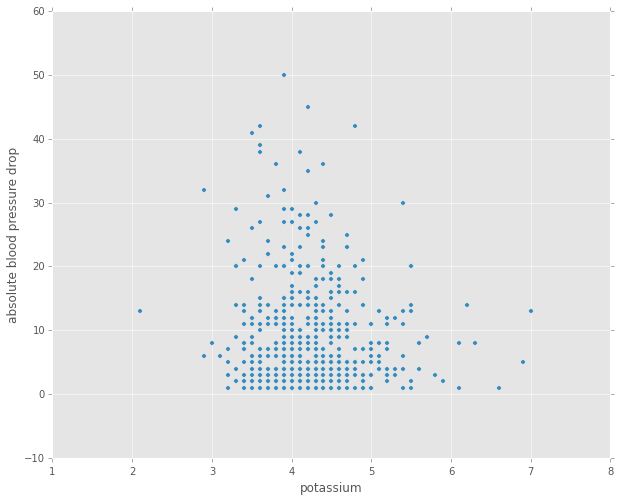

In [65]:
# plot the absolute blood pressure vs potassium level
ax2 = df1.plot(kind='scatter', x='potassium',y='ab_map_drop')
ax2.set_ylabel("absolute blood pressure drop")

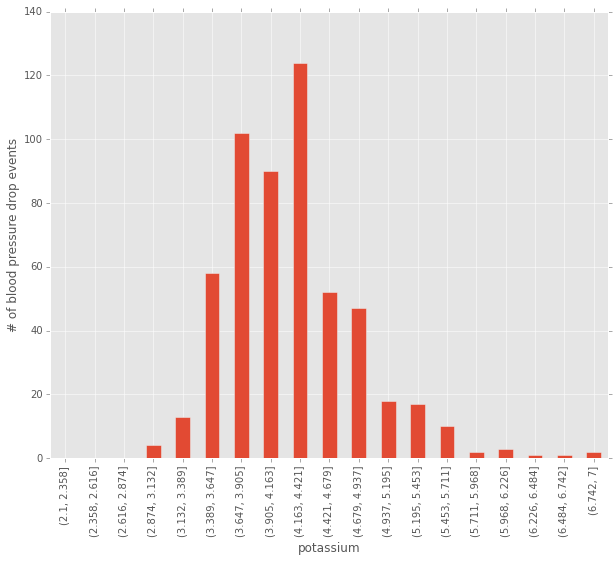

In [66]:
# Bin the blood pressure drop by potassium level, and plot of # of events vs potassium level in bins
bins = np.linspace(df1.potassium.min(), df1.potassium.max(), 20)
groups = df1.groupby(pd.cut(df1.potassium, bins))
dropcount = groups.count().ab_map_drop
ax = dropcount.plot(kind="bar")
ax.set_ylabel('# of blood pressure drop events')

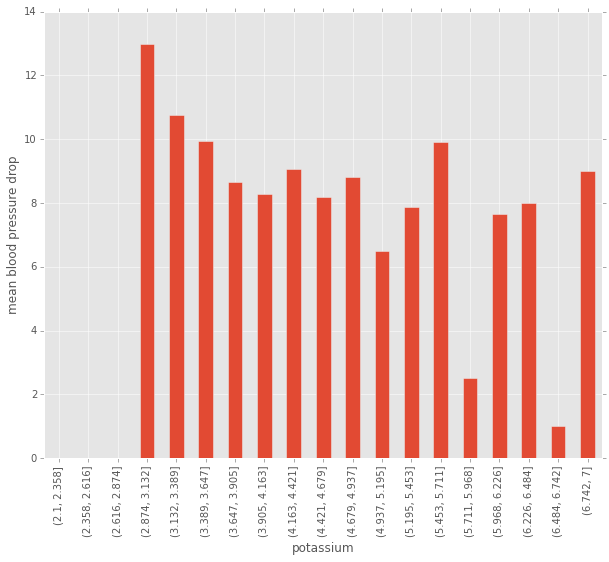

In [67]:
# plot of average blood pressure vs potassium level in bins
dropmean = groups.mean().ab_map_drop
ax1 = dropmean.plot(kind='bar')
ax1.set_ylabel("mean blood pressure drop")

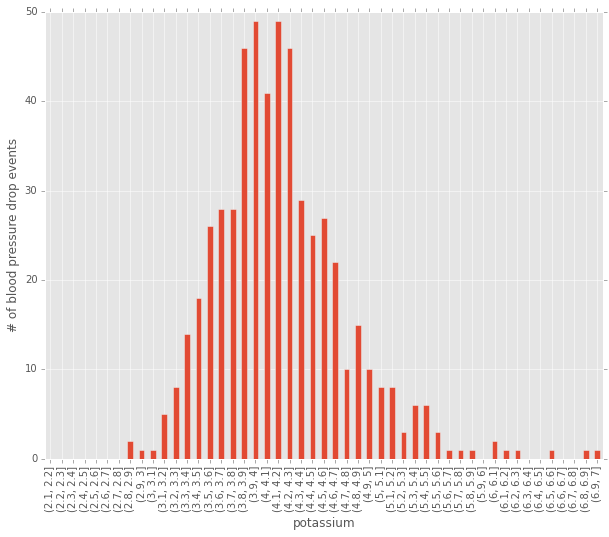

In [68]:
# Try smaller bin size, #ofBins = 50
bins = np.linspace(df1.potassium.min(), df1.potassium.max(), 50)
groups = df1.groupby(pd.cut(df1.potassium, bins))
dropcount = groups.count().ab_map_drop
ax = dropcount.plot(kind="bar")
ax.set_ylabel('# of blood pressure drop events')

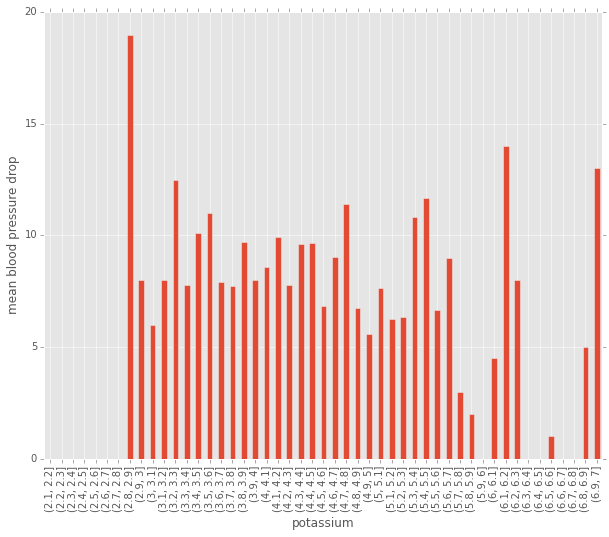

In [69]:
# plot of average blood pressure vs potassium level in bins
dropmean = groups.mean().ab_map_drop
ax1 = dropmean.plot(kind='bar')
ax1.set_ylabel("mean blood pressure drop")